Tarea realizada por:
Fernando Merino Benitez y
Sebastián Valderrábano Cabrera

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
from skimage.io import imread
from skimage.transform import resize
from skimage import data
from skimage.filters import sobel_h, sobel_v, gaussian
from skimage.feature import peak_local_max
from scipy.ndimage import convolve

# Section 1: Harris corner detector

(200, 200)


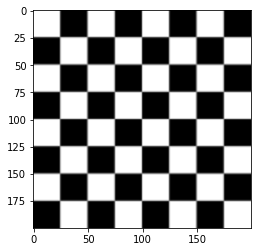

In [16]:
# Load one sample image
img = data.checkerboard()
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

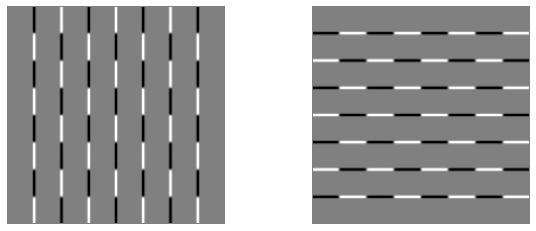

In [17]:
# Compute derivative in x and y direction
dy = sobel_h(img) # [1 0 -1]
dx = sobel_v(img) # [1 0 -1]^T

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(dx, cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(dy, cmap='gray')
plt.axis('off')
plt.show()

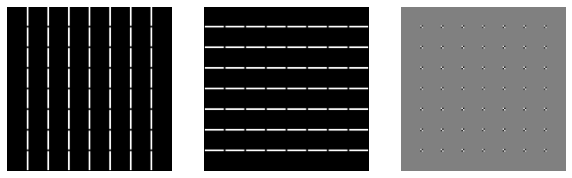

In [18]:
# Compute second-moment partial matrices
dx2 = dx**2
dy2 = dy**2
dxy = dx * dy

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(dx2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dy2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dxy, cmap='gray')
plt.axis('off')
plt.show()

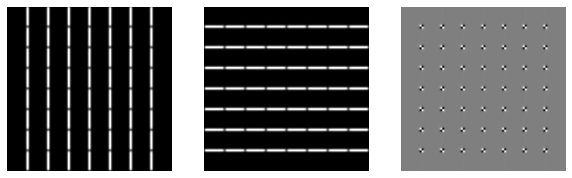

In [19]:
# Gaussian smoothing for numerical stability
dx2 = gaussian(dx2, sigma=1)
dy2 = gaussian(dy2, sigma=1)
dxy = gaussian(dxy, sigma=1)

# plot
plt.figure(figsize=(10, 4))
plt.subplot(1, 3, 1)
plt.imshow(dx2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(dy2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(dxy, cmap='gray')
plt.axis('off')
plt.show()

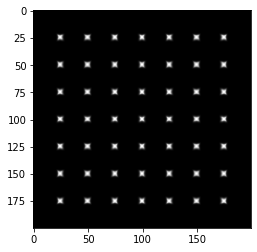

In [20]:
# Compute the M tensor-structure (4D representation) for each pixel, and then
# its corresponding R value (cornerness index)
R = np.zeros_like(img, dtype='float32')
for row in range(img.shape[0]):
  for col in range(img.shape[1]):
    M = np.array([[dx2[row, col], dxy[row, col]],
                  [dxy[row, col], dy2[row, col]]]).astype('float32')
    det = np.linalg.det(M)
    tra = np.trace(M)
    if (det != 0) and (tra != 0):
      R[row, col] = det / tra

# plot R
plt.imshow(R, cmap='gray')
plt.show()

(196, 2)


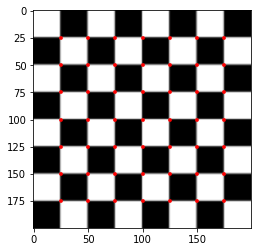

In [21]:
# Apply non local-maxima suppression
coord = peak_local_max(R, min_distance=10) # Note that output is in form (x, y)
print(coord.shape)

# Plot
plt.imshow(img, cmap='gray')
plt.scatter(coord[:, 1], coord[:, 0], s=2, c='r')
plt.show()

# Section 2: DoG

(303, 384)


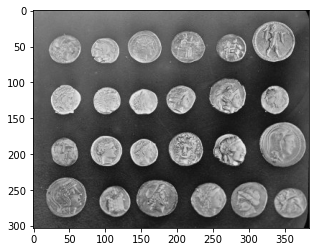

In [22]:
# Load one sample image
img = data.coins()
print(img.shape)

plt.imshow(img, cmap='gray')
plt.show()

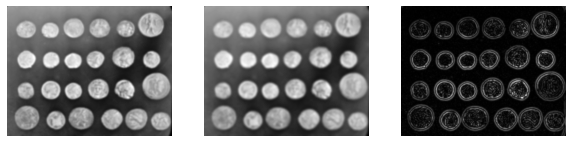

In [23]:
# Two consecutive Gaussian smoothing operations, then compute de DoG
img_gauss1 = gaussian(img, sigma=1.6)
img_gauss2 = gaussian(img_gauss1, sigma=1.6)
DoG = np.abs(img_gauss1 - img_gauss2)

# plot
plt.figure(figsize=(10, 6))
plt.subplot(1, 3, 1)
plt.imshow(img_gauss1, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img_gauss2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(DoG, cmap='gray')
plt.axis('off')
plt.show()

In [24]:
# Use DoG from scikit image
from skimage.feature import blob_dog
blobs = blob_dog(img, max_sigma=30, threshold=.1)
print(blobs.shape)

# Normalize radius compensating for larger smoothing
blobs[:, 2] = blobs[:, 2] * np.sqrt(2.)

(40, 3)


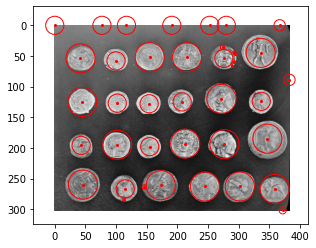

In [25]:
# Plot them
fig, ax = plt.subplots(1, 1)
ax.imshow(img, cmap='gray')
ax.scatter(blobs[:, 1], blobs[:, 0], s=4, c='r')
for blob in blobs:
  y, x, r = blob
  c = plt.Circle((x, y), r, color='r', linewidth=1, fill=False)
  ax.add_patch(c)
plt.show()

# Section 3: Mini-proyect -- ORB

In [26]:
# Usa las siguientes tres imagenes (cárgalas de disco) para este miniproyecto

In [27]:
# Image size
N_ROWS = 180
N_COLS = 320

In [28]:
# Load images
img1 = resize(imread("image_0003.jpg", as_gray=True), (N_ROWS, N_COLS))
img2 = resize(imread("image_0004.jpg", as_gray=True), (N_ROWS, N_COLS))
img3 = resize(imread("image_0009.jpg", as_gray=True), (N_ROWS, N_COLS))

print(img1.shape)
print(img2.shape)
print(img3.shape)

(180, 320)
(180, 320)
(180, 320)


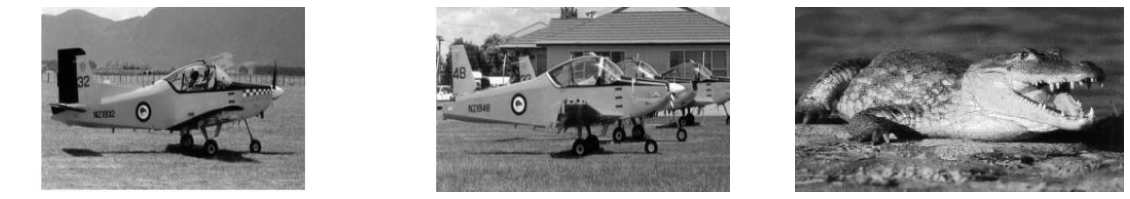

In [29]:
# Plot them
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.imshow(img1, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(img2, cmap='gray')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(img3, cmap='gray')
plt.axis('off')
plt.show()

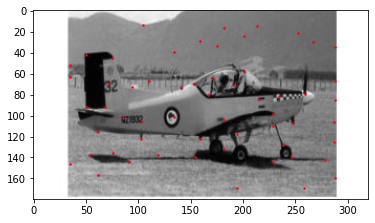

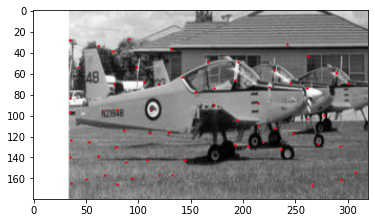

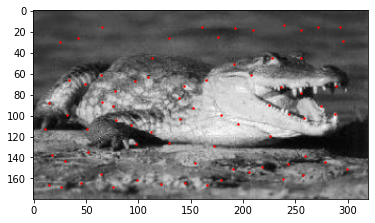

In [30]:
# == Q1 ==
# En el detector de esquinas de Harris, ¿Qué efecto produce el cálculo de las
# matrices de segundo orden dxdx, dydy, dxdy (Por qué son relevantes en este
# método, qué significan físicamente en términos de magnitud de la luz)?

#Detectan los bordes y esquinas de la imagen:
#bordes verticales (dxdx), bordes horizontales (dydy) y bordes diagonales(dxdy)
#Esto es relevante porque se utilizan estos cambios detectados para detectar las
#esquinas de la imagen en aquellos puntos donde se crucen estos bordes detectados
#En terminos de magnitud de la luz, aquellos bordes que se detectan son los 
#puntos donde hay un cambio en la intensidad de los pixeles, o intensidad de la luz

imags=[img1,img2,img3]

for x in imags:
  dy = sobel_h(x) # [1 0 -1]
  dx = sobel_v(x) # [1 0 -1]^T
  0
  dx2 = dx**2
  dy2 = dy**2
  dxy = dx * dy

  dx2 = gaussian(dx2, sigma=1)
  dy2 = gaussian(dy2, sigma=1)
  dxy = gaussian(dxy, sigma=1)
  
  R = np.zeros_like(x, dtype='float32')
  for row in range(x.shape[0]):
    for col in range(x.shape[1]):
      M = np.array([[dx2[row, col], dxy[row, col]],
                    [dxy[row, col], dy2[row, col]]]).astype('float32')
      det = np.linalg.det(M)
      tra = np.trace(M)
      if (det != 0) and (tra != 0):
        R[row, col] = det / tra

  coord = peak_local_max(R, min_distance=10)
  plt.imshow(x, cmap='gray')
  plt.scatter(coord[:, 1], coord[:, 0], s=2, c='r')
  plt.show()

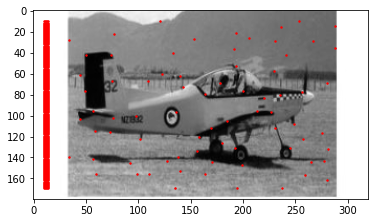

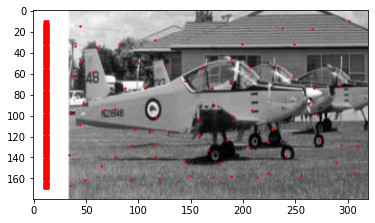

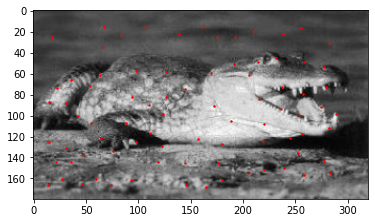

In [48]:
# == Q2 ==
# ¿Qué sucede si no aplicamos suavizado Gaussiano a las matrices de segundo
# orden? i.e., 
# dx2 = gaussian(dx2, sigma=1)
# dy2 = gaussian(dy2, sigma=1)
# dxy = gaussian(dxy, sigma=1)

#Si no aplicamos el suavizado Gaussiano los bordes y esquinas no se "difuminan"
#lo cual causa que al tratar de detectar las esquinas, algunas se detecten con
#menor intensidad o no se detecten en absoluto, incluso como podemos ver en las
#imagenes con aviones, hay falsos positivos.

for x in imags:
  dy = sobel_h(x) # [1 0 -1]
  dx = sobel_v(x) # [1 0 -1]^T
  0
  dx2 = dx**2
  dy2 = dy**2
  dxy = dx * dy
  
  R = np.zeros_like(x, dtype='float32')
  for row in range(x.shape[0]):
    for col in range(x.shape[1]):
      M = np.array([[dx2[row, col], dxy[row, col]],
                    [dxy[row, col], dy2[row, col]]]).astype('float32')
      det = np.linalg.det(M)
      tra = np.trace(M)
      if (det != 0) and (tra != 0):
        R[row, col] = det / tra

  coord = peak_local_max(R, min_distance=10)
  plt.imshow(x, cmap='gray')
  plt.scatter(coord[:, 1], coord[:, 0], s=2, c='r')
  plt.show()

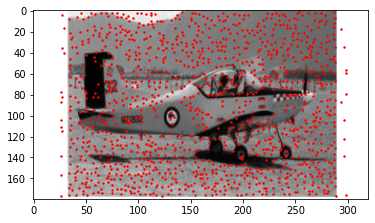

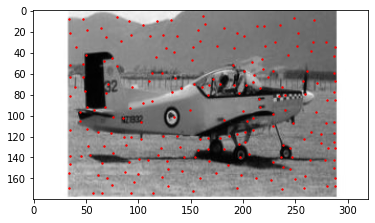

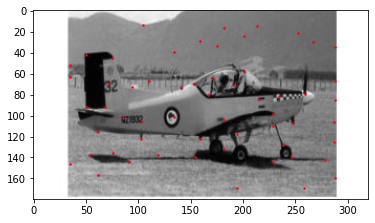

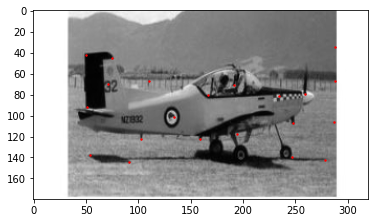

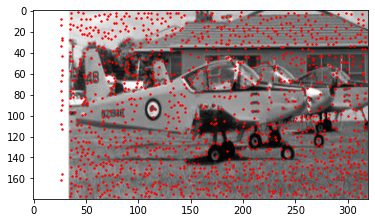

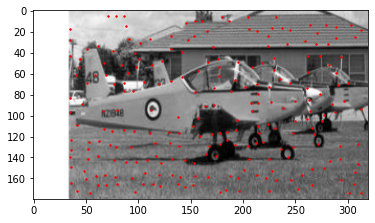

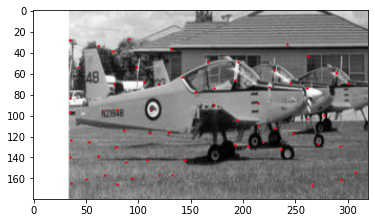

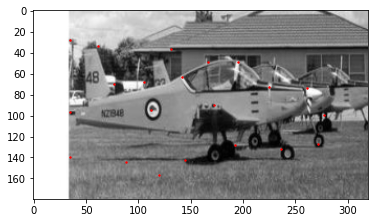

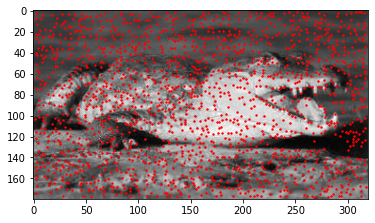

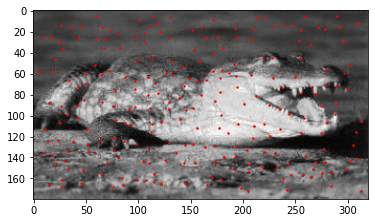

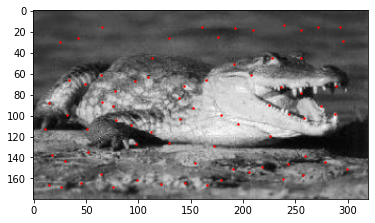

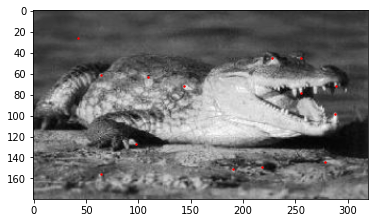

In [49]:
# == Q3 ==
# ¿Qué effecto tiene el valor del parámetro "min_distance" de la función
# peak_local_max?

#min_distance hace referencia a la distancia mínima que hay de separación
#entre los picos de una imagen. A mayor valor de min_distance, mayor separación
#se busca entre los picos, por lo que se detectan menos picos. Por default
#min_distance tiene un valor de 1
mind= [1,5,10,20]
for x in imags:
  for d in mind:
    dy = sobel_h(x) # [1 0 -1]
    dx = sobel_v(x) # [1 0 -1]^T
    0
    dx2 = dx**2
    dy2 = dy**2
    dxy = dx * dy
    
    dx2 = gaussian(dx2, sigma=1)
    dy2 = gaussian(dy2, sigma=1)
    dxy = gaussian(dxy, sigma=1)

    R = np.zeros_like(x, dtype='float32')
    for row in range(x.shape[0]):
      for col in range(x.shape[1]):
        M = np.array([[dx2[row, col], dxy[row, col]],
                      [dxy[row, col], dy2[row, col]]]).astype('float32')
        det = np.linalg.det(M)
        tra = np.trace(M)
        if (det != 0) and (tra != 0):
          R[row, col] = det / tra

    coord = peak_local_max(R, min_distance=d)
    plt.imshow(x, cmap='gray')
    plt.scatter(coord[:, 1], coord[:, 0], s=2, c='r')
    plt.show()

In [ ]:
# == Q4 ==
# En la función "blob_dog", ¿qué impacto tiene cambiar los valores de los
# parámetros "max_sigma"  y "threshold"?

#max_sigma:
  #Es la desviación estándar máxima del kernel gaussiano. Determina el tamaño
  #máximo que puede tener un blob por lo que si aumentamos su valor, los blobs
  #serán de mayor de tamaño. (Análogo en el caso de min_sigma)
  #threshold:
  # Es un valor mínimo que debe de tener un máximo local de intensidad para ser
  #detectado como parte de un blob. Si disminuimos su valor, se detectarán blobs
  #con menor diferencia tonalidad, por lo que habrá más blobs. Si lo aumentamos
  #ocurrirá lo contrario, se detectaran solo los blobs con alta diferencia de
  #tonalidad y por ende habrá menos blobs detectados.


(18, 3)


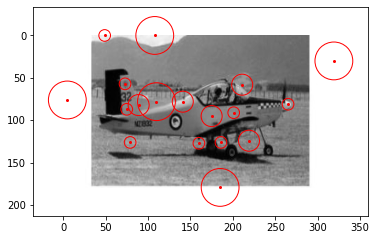

(25, 3)


/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:125: RuntimeWarning: invalid value encountered in double_scalars
  r1 = blob1[-1] / blob2[-1]
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:126: RuntimeWarning: divide by zero encountered in true_divide
  pos1 = blob1[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:127: RuntimeWarning: divide by zero encountered in true_divide
  pos2 = blob2[:ndim] / (max_sigma * root_ndim)
/usr/local/lib/python3.6/dist-packages/skimage/feature/blob.py:129: RuntimeWarning: invalid value encountered in subtract
  d = np.sqrt(np.sum((pos2 - pos1)**2))


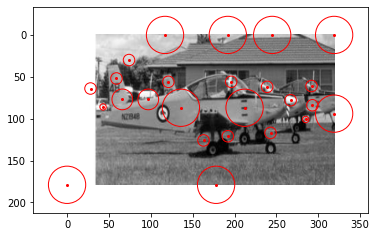

(22, 3)


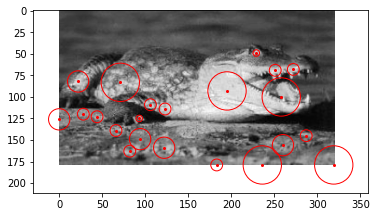

In [47]:
# == Q5 ==
# Experimenta con varios valores de parámetros para la detección de blobs con
# DoG, y reporta la combinación que tenga mejor desempeño en las tres imágenes
# de este ejercicio, i.e., detecte la mayor cantidad de blobs, sin falsos positivos
# ni falsos negativos, en promedio en las tres imágenes.
# Justifica tu respuesta y muestra los blobs

#Los valores de oaremetros  que nos dieron un mejor resultado en promedio de las
#tres imagenes fueron los siguientes:
#Min_sigma = 1.5
#Max sigma = 20
#threshold = .3
#sigma_ratio = 1.8
#La razón por la que se eligieron estos datos es porque mostraron el menor número
#de falsos positivos en promedio de las tres imagenes.
#El min sigma se aumentó para disminuir los falsos positivos, pues si era menor
#a ese valor aparecían más falsos positivos en pasto y tierra.
#El max sigma se dejo en 20 pues con un valor mayor los falsos positivos tenían 
#mayor tamaño y desaparecían algunos verdaderos positivos.
#Se dejó el threshold en .3 pues esto permitía detectar mas blobs positivos en
#promedio de las tres imagenes, minimizando los falsos positivos.
#El sigma ratio se dejó en 1.8 pues un valor menor nos dejaba con pocos blobs
#que en su mayoría era falsos positivos, eliminando verdaderos positivos,
# y un valor mayor aumentaba el número de blobs, pero a su vez aumentaba el número 
#de falsos positivos

from skimage.feature import blob_dog

for x in imags:
  blobs = blob_dog(x,min_sigma=1.5, max_sigma=20, threshold=.3,sigma_ratio=1.8)
  print(blobs.shape)

  # Normalize radius compensating for larger smoothing
  blobs[:, 2] = blobs[:, 2] * np.sqrt(2.)

  fig, ax = plt.subplots(1, 1)
  ax.imshow(x, cmap='gray')
  ax.scatter(blobs[:, 1], blobs[:, 0], s=4, c='r')
  for blob in blobs:
    y, x, r = blob
    c = plt.Circle((x, y), r, color='r', linewidth=1, fill=False)
    ax.add_patch(c)
  plt.show()

In [ ]:
## == Q6 ==
# Investiga qué son el detector y descriptor ORB
# Haz un pequeño reporte de 1 a 2 páginas, explicando qué son y para qué sirven.
# Ref: skimage.feature.ORB
# Ref: https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf
# Ref: https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_orb/py_orb.html#orb

# Detector y descriptor ORB


ORB es una alternativa a los algoritmos SIFT y SURF de uso libre. Éste combina un detector FAST, que identifica características en una imagen, y un descriptor BRIEF haciendo optimizaciones para mejorar el rendimiento con un algoritmo binario. 

El detector de ORB permite detectar características en una imagen con alto rendimiento y bajo costo. Este tiene una velocidad mayor a su alternativa FAST debido a un componente de orientación rápido y eficiente. Sin embargo, queremos entender cómo funciona este algoritmo. Al estar basado en FAST, discutiremos primero este algoritmo.

FAST realiza comparaciones del brillo de un pixel dado contra 16 otros que se encuentran alrededor de este. Se clasifican en tres clases, similar, claro u oscuro; y si se tienen más de ocho pixeles oscuros o claros en comparación con el pixel seleccionado se selecciona este como un punto clave. De esta forma, podemos ir localizando las esquinas en una imagen.

Ahora, ORB agrega a este proceso un componente de orientación para optimizar el proceso, así como una pirámide de varias escalas de la imagen. Esta pirámide es una representación de una imagen reproducida secuencialmente en distintas resoluciones. Cada nivel contiene una copia de menor tamaño en los cuales se detectan los puntos clave de la imagen.

Con los puntos clave localizados, se asigna una orientación a cada uno dependiendo de los cambios de intensidad alrededor de cada pixel identificado. Este proceso se hace calculado el centroide de intensidad, asumiendo que hay una desviación con respecto al centro en una esquina. Se calculan los momentos de cada parte para después encontrar el centro de masa del pixel y finalmente construir un vector del centro al centroide.

Para el descriptor, ORB se basa en el método BRIEF utilizando todos los puntos clave encontrados previamente por FAST. Estos se convierten en un vector de binario, con los cuales se representa un objeto, de tamaño 128 a 512 bits. Se suaviza la imagen con un kernel gaussiano, eliminando el ruido para que se pueden seleccionar pares de pixeles, al azar, cercanos al punto clave. Se busca que el primer pixel tenga una desviación estándar igual a sigma, mientras que el segundo tiene desviación estándar de dos veces el valor sigma. Se comparan los pixeles y si el primero es más brilloso o claro, se le asigna el valor uno sino es igual a cero.

El ángulo de orientación definido por FAST se utiliza en incrementos de dos veces el valor de pi sobre treinta. De esta manera se construyen tablas con patrones pre calculados, y estas permiten computar los descriptores de forma eficiente. Por lo tanto el algoritmo BRIEF utilizado por ORB inicia con una prueba contra todos los puntos clave dados por el método FAST. 

Se ordenan las pruebas tomando en cuenta su distancia de un promedio de 0.5 para generar un vector. Finalmente, se hace una búsqueda en la cual la primera prueba se guarda en un nuevo vector de resultados, se saca la siguiente prueba y se compara contra los valores en el vector resultado. Si la correlación es mayor que un rango determinado se descarta, sino se añade la prueba al vector de resultados y se repite el proceso hasta que se tienen 256 pruebas en el vector de resultados.




In [ ]:
# == Q7 ==
# Usando la implementación de opencv o scikit-image, detecta y grafica los puntos
# ORB para las tres imágenes de este ejercicio.

import cv2
from google.colab.patches import cv2_imshow

#Primera imagen
start = timeit.default_timer()
#Se lee imagen con cv2 y se pone en escala de grises 
img = cv2.imread('image_0003.jpg',cv2.IMREAD_GRAYSCALE)
#Se carga el agloritmo de orb 
orb = cv2.ORB_create(nfeatures=1500)
#Se encuentran los puntos claves y los descriptores en la imagen de ORB
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
#Se grafican los puntos detectados en la imagen
img = cv2.drawKeypoints(img, keypoints_orb, None)
#Fue necesario usar cv2_imshow debido a errores con cv2.imshow("Image",img) en
#Google Colab
end1 = timeit.default_timer() - start
cv2_imshow(img)

#Segunda imagen
start = timeit.default_timer()
img = cv2.imread('image_0004.jpg',cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
img = cv2.drawKeypoints(img, keypoints_orb, None)
end2 = timeit.default_timer() - start
cv2_imshow(img)

#Tercera imagen
start = timeit.default_timer()
img = cv2.imread('image_0009.jpg',cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create(nfeatures=1500)
keypoints_orb, descriptors = orb.detectAndCompute(img, None)
img = cv2.drawKeypoints(img, keypoints_orb, None)
end3 = timeit.default_timer() - start
cv2_imshow(img)

timeORB = [end1, end2, end3]

In [ ]:
# == Q8 ==
# Compara el desempeño de Harris, DoG, y ORB en las tres imágenes de este ejercicio,
# ¿Cuál detector de PoI pareciera ser mejor? ¿En qué casos?

# Imagen_0003

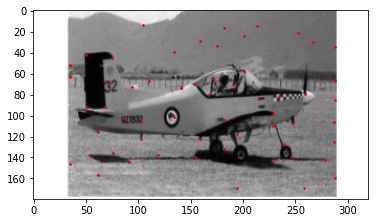
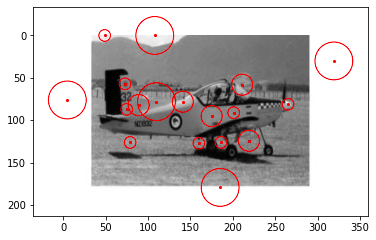
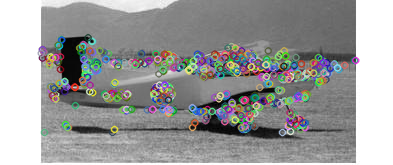

En este primer ejemplo vemos que con Harris, los puntos son menos pero las sombras debajo del avión son identificadas claramente, sin embargo también tiene un gran área en la que tiene puntos que no son esquinas. Viendo la detección de DoG, notamos que si encuentra varios espacios de contraste, pero también sale del espacio delimitado de la imgane, detectando esquinas que no están ahi. Finalmente, en ORB vemos que se notan las esquinas y tiene muchos puntos pero solamente se trabaja sobre este objeto, las montañas y otras esquinas no son consideradas en contraste con las otras. 

# Image_0004

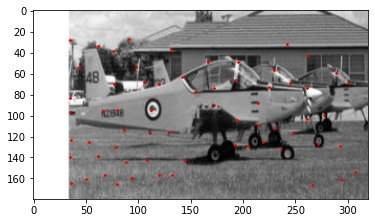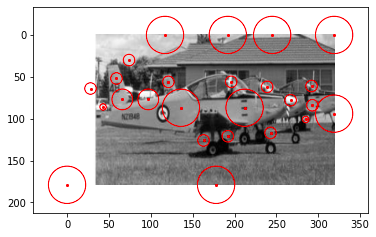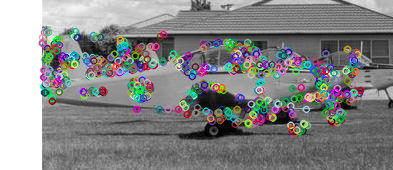

En esta segunda imagen confirmamos varias de las observaciones que hicimos en la pasada. Harris detecta más esquina que los otros, pero tiene errores y no cubre grandes áreas. DoG cubre grandes áreas con puntos clave pero varios de estos se encuentran fuera de la imagen en cuestión. ORB se enfoca principalmente en las esquinas del objeto principal, pero esquinas en objetos secundarios o alrededores no son detectadas

# Image_0009

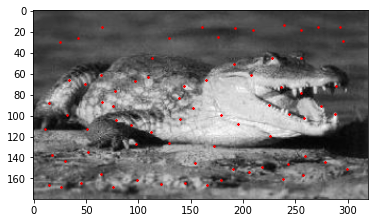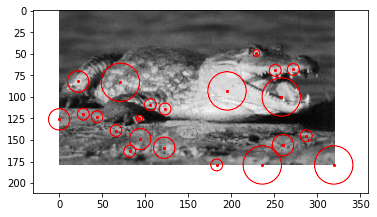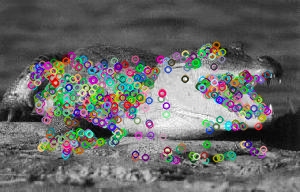

In [ ]:
#Revisando los timepos de cada método en las imágenes vemos lo siguiente
print(timeHarrisE)
print(timeDogE)
print(timeORB)

[1.4674074960003054, 1.5168835040003614, 1.534654782000871]
[0.09713887500038254, 0.09675843200056988, 0.0928804979994311]
[0.01570646899926942, 0.018874747000154457, 0.01855531500041252]


Analizando los tiempos, vemos que ORB es el más rápido de todos los procesos utilizados, mientras que Harris es el que tiene un tiempo de ejecución mayor. DoG es un punto medio entre estos dos. Tomando esto en cuenta con los puntos vistos en las imágenes, parece que ORB es mejor ya que detecta la mayoría de las esquinas en una imagen y tiene el menor tiempo de ejecución. Sin embargo, si se necesita mayor precisión en la delimitación es posible usar Harris a pesar de que la pérdida en eficiencia de tiempo. DoG permite detectar varias áreas de interés, pero los errores en áreas que no corresponden a la imagen analizada y un tiempo menos eficiente que ORB nos indica que este es mejor para casos particulares con mayores contrastes.

In [ ]:
# == Deadline ==
# Lunes 14 de septiembre.
# 6:00 pm.
# En PDF (pueden salvar el notebook como PDF).